In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')

In [2]:
df = pd.read_csv(r"D:\EOY Datasets\Full Datasets\Everything_cleaned.csv",index_col=0)

C:\Users\ellio\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df['Month'] = pd.to_datetime(df['Month'])
#df['Year'] = pd.to_datetime(df['Year'])

In [4]:
df.head()

,Crime_ID,Month,Reported_by,Crime_type,Outcome_type,Year,Level_of_Lockdown,Region
0,e9a50727f2189e0c50f704e3661bc1a8ae3a39aece4866...,2019-01-01,Avon and Somerset,Violence and sexual offences,No suspect identified,2019,No Lockdown,South West
1,fb06f54e9d633a961109ef74171e4beb40b2fe44e57a10...,2019-01-01,Avon and Somerset,Violence and sexual offences,Unable to prosecute suspect,2019,No Lockdown,South West
2,4655ba031d5c8d00b247577a22472fbb8f9130d98b7d95...,2019-01-01,Avon and Somerset,Violence and sexual offences,No suspect identified,2019,No Lockdown,South West
3,2830f28a4a93138717182d1cc51b6d77cfaf3c27398934...,2019-01-01,Avon and Somerset,Theft offences,No suspect identified,2019,No Lockdown,South West
4,ca01d599d45f6e1d1bc5b05ddc6a1b559870fc831baa8e...,2019-01-01,Avon and Somerset,Theft offences,No suspect identified,2019,No Lockdown,South West


In [5]:
grouped = df.groupby(['Year','Crime_type'])['Crime_ID'].count()
grouped = grouped.reset_index()

In [6]:
grouped

,Year,Crime_type,Crime_ID
0,2019,Criminal damage and arson,441936
1,2019,Drug offences,149840
2,2019,Public order offences,340925
3,2019,Theft offences,1094973
4,2019,Violence and sexual offences,1516608
5,2020,Criminal damage and arson,427073
6,2020,Drug offences,169180
7,2020,Public order offences,391677
8,2020,Theft offences,965238
9,2020,Violence and sexual offences,1624924


In [7]:
crim = grouped[grouped.Crime_type == 'Criminal damage and arson']
crim['Crime_ID'] = (crim['Crime_ID']-crim.Crime_ID[0])/crim.Crime_ID[0]

<ipython-input-7-d40f0c623a77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crim['Crime_ID'] = (crim['Crime_ID']-crim.Crime_ID[0])/crim.Crime_ID[0]


In [8]:
crim

,Year,Crime_type,Crime_ID
0,2019,Criminal damage and arson,0.000000
5,2020,Criminal damage and arson,-0.033632
10,2021,Criminal damage and arson,-0.154776


<AxesSubplot:xlabel='Year', ylabel='Crime_ID'>

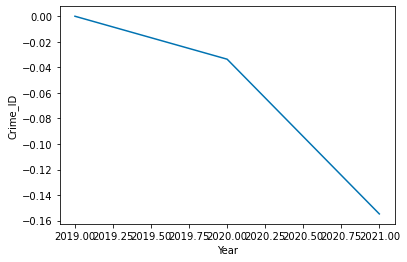

In [9]:
sns.lineplot(data=crim,x='Year',y='Crime_ID')

In [10]:
grouped2 = df.groupby(['Month','Crime_type'])['Crime_ID'].count()
grouped2 = grouped2.reset_index()
grouped2

,Month,Crime_type,Crime_ID
0,2019-01-01,Criminal damage and arson,36557
1,2019-01-01,Drug offences,10964
2,2019-01-01,Public order offences,23749
3,2019-01-01,Theft offences,93564
4,2019-01-01,Violence and sexual offences,116769
...,...,...,...
175,2021-12-01,Criminal damage and arson,19252
176,2021-12-01,Drug offences,4987
177,2021-12-01,Public order offences,14742
178,2021-12-01,Theft offences,42251


In [11]:
crim2 = grouped2[grouped2.Crime_type == 'Criminal damage and arson']
#crim2['Crime_ID'] = (crim2['Crime_ID']-crim2.Crime_ID[0])/crim2.Crime_ID[0]

In [12]:
crim2 = crim2.reset_index(drop=True)
crim2.Crime_ID[0] = crim2.Crime_ID[0:12].median()

<ipython-input-12-f31dd6005d3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crim2.Crime_ID[0] = crim2.Crime_ID[0:12].median()


In [13]:
np.arange(1,12)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [14]:
crim2 = crim2.drop(np.arange(1,12),axis=0)

In [15]:
crim2
crim2['Crime_ID'] = (crim2['Crime_ID']-crim2.Crime_ID[0])/crim2.Crime_ID[0]
crim2

,Month,Crime_type,Crime_ID
0,2019-01-01,Criminal damage and arson,0.000000
12,2020-01-01,Criminal damage and arson,0.029750
13,2020-02-01,Criminal damage and arson,-0.089983
14,2020-03-01,Criminal damage and arson,0.014415
15,2020-04-01,Criminal damage and arson,-0.228304
16,2020-05-01,Criminal damage and arson,-0.144309
17,2020-06-01,Criminal damage and arson,-0.047498
18,2020-07-01,Criminal damage and arson,0.079118
19,2020-08-01,Criminal damage and arson,0.097028
20,2020-09-01,Criminal damage and arson,0.022083


In [16]:
crim2 = crim2.reset_index(drop=True)
crim2[0:12]

,Month,Crime_type,Crime_ID
0,2019-01-01,Criminal damage and arson,0.000000
1,2020-01-01,Criminal damage and arson,0.029750
2,2020-02-01,Criminal damage and arson,-0.089983
3,2020-03-01,Criminal damage and arson,0.014415
4,2020-04-01,Criminal damage and arson,-0.228304
5,2020-05-01,Criminal damage and arson,-0.144309
6,2020-06-01,Criminal damage and arson,-0.047498
7,2020-07-01,Criminal damage and arson,0.079118
8,2020-08-01,Criminal damage and arson,0.097028
9,2020-09-01,Criminal damage and arson,0.022083


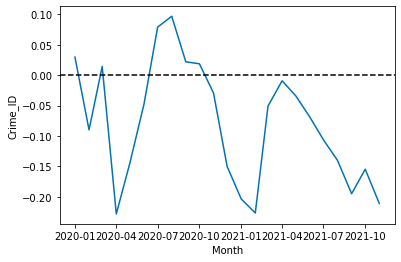

In [17]:
sns.lineplot(data=crim2[1:-1],x='Month',y='Crime_ID')
plt.axhline(y=0,xmin=0,xmax=1,linestyle='--',color='black')

Only works when using subplots or defining an axis.

In [18]:
def plotter(df_grouped,crime_type,ax=None,**kwargs):
    crim = df_grouped[df_grouped.Crime_type == crime_type]
    crim = crim.reset_index(drop=True)
    crim.loc[0,'Crime_ID'] = crim.Crime_ID[0:12].median()
    crim = crim.drop(np.arange(1,12),axis=0)
    crim['Crime_ID'] = ((crim['Crime_ID']-crim.Crime_ID[0])/crim.Crime_ID[0])*100
    ax=ax
    ax.set_title(crime_type)
    ax.set_ylabel('Percentage Change (%)')
    sns.lineplot(data=crim[1:-1],x='Month',y='Crime_ID',ax=ax,**kwargs)
    ax.set_ylim(-50,50)
    ax.axhline(y=0,xmin=0,xmax=1,linestyle='--',color='black',linewidth=0.75)
    return ax

In [19]:
crim2.loc[0,'Crime_ID']

0.0

In [20]:
#plotter(grouped2,'Criminal damage and arson')

These show the percentage difference of each month from the overall median value for 2019 for each crime type

In [21]:
# fig,(a1,a2) = plt.subplots(1,2,figsize=(20,5))
# plotter(grouped2,'Criminal damage and arson',ax=a1)
# plotter(grouped2,'Drug offences',ax=a2)
# fig2,(a3,a4,a5) = plt.subplots(1,3,figsize=(20,5))
# plotter(grouped2,'Public order offences',ax=a3)
# plotter(grouped2,'Theft offences',ax=a4)
# plotter(grouped2,'Violence and sexual offences',ax=a5)
# plt.show()

In [22]:
plt.rcParams['font.size'] = '16'

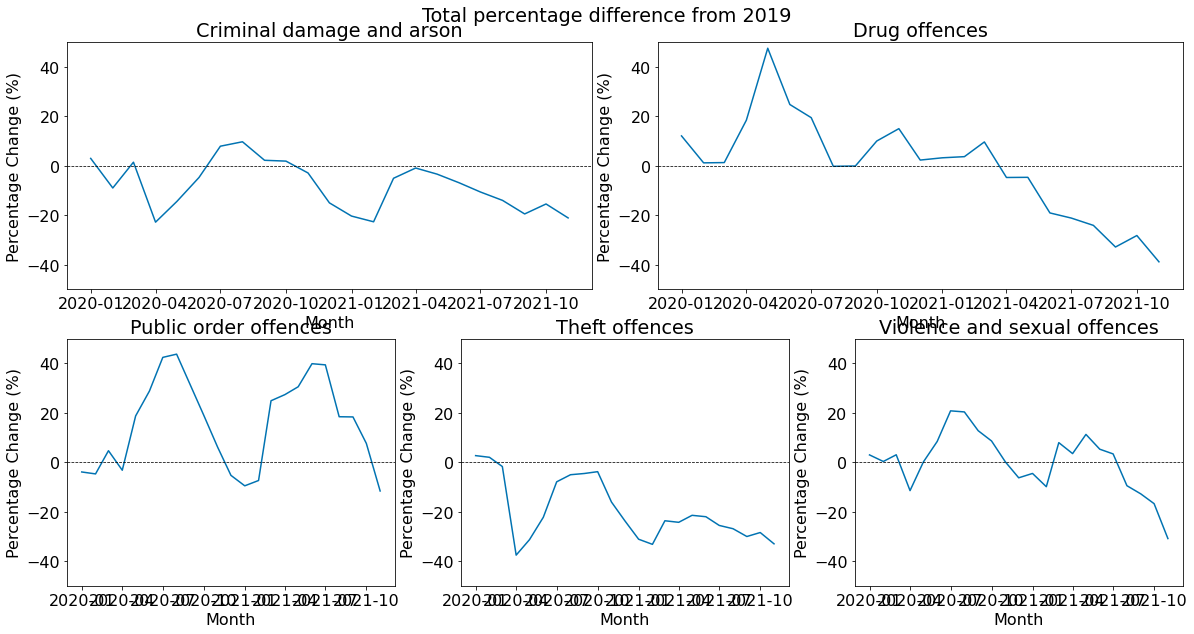

In [23]:
fig = plt.figure(figsize=(20,10))
grid = plt.GridSpec(2, 6, wspace=0.5, hspace=0.2)
a1 = fig.add_subplot(grid[0,:3])
a2 = fig.add_subplot(grid[0,3:])
a3 = fig.add_subplot(grid[1, :2])
a4 = fig.add_subplot(grid[1, 2:4])
a5 = fig.add_subplot(grid[1, 4:])
plotter(grouped2,'Criminal damage and arson',ax=a1)
plotter(grouped2,'Drug offences',ax=a2)
plotter(grouped2,'Public order offences',ax=a3)
plotter(grouped2,'Theft offences',ax=a4)
plotter(grouped2,'Violence and sexual offences',ax=a5)
fig.suptitle('Total percentage difference from 2019',y=0.93)
#fig.savefig('Total percentage difference from 2019.jpg')
plt.show()

In [24]:
crim3 = grouped2[grouped2.Crime_type == 'Criminal damage and arson'].reset_index(drop=True)
#crim3.Crime_ID.pct_change(12)

In [25]:
def plotter2(df_grouped,crime_type,ax=None,**kwargs):
    crim = df_grouped[df_grouped.Crime_type == crime_type]
    crim = crim.reset_index(drop=True)
    crim.loc[:,'Crime_ID'] = crim.Crime_ID.pct_change(12)
    crim.loc[:,'Crime_ID'] = crim.loc[:,'Crime_ID']*100
    crim = crim.drop(np.arange(0,12),axis=0)
    ax=ax
    ax.set_title(crime_type)
    ax.set_ylabel('Percentage Change (%)')
    sns.lineplot(data=crim[1:-1],x='Month',y='Crime_ID',ax=ax,**kwargs)
    ax.set_ylim(-50,50)
    ax.axhline(y=0,xmin=0,xmax=1,linestyle='--',color='black',linewidth=0.75)
    return ax

These show the percentage difference from 12 months ago, e.g April 2020 compared to April 2019. 

In [26]:
# fig,(a1,a2) = plt.subplots(1,2,figsize=(20,5))
# plotter2(grouped2,'Criminal damage and arson',ax=a1)
# plotter2(grouped2,'Drug offences',ax=a2)
# fig2,(a3,a4,a5) = plt.subplots(1,3,figsize=(20,5))
# plotter2(grouped2,'Public order offences',ax=a3)
# plotter2(grouped2,'Theft offences',ax=a4)
# plotter2(grouped2,'Violence and sexual offences',ax=a5)
# plt.show()

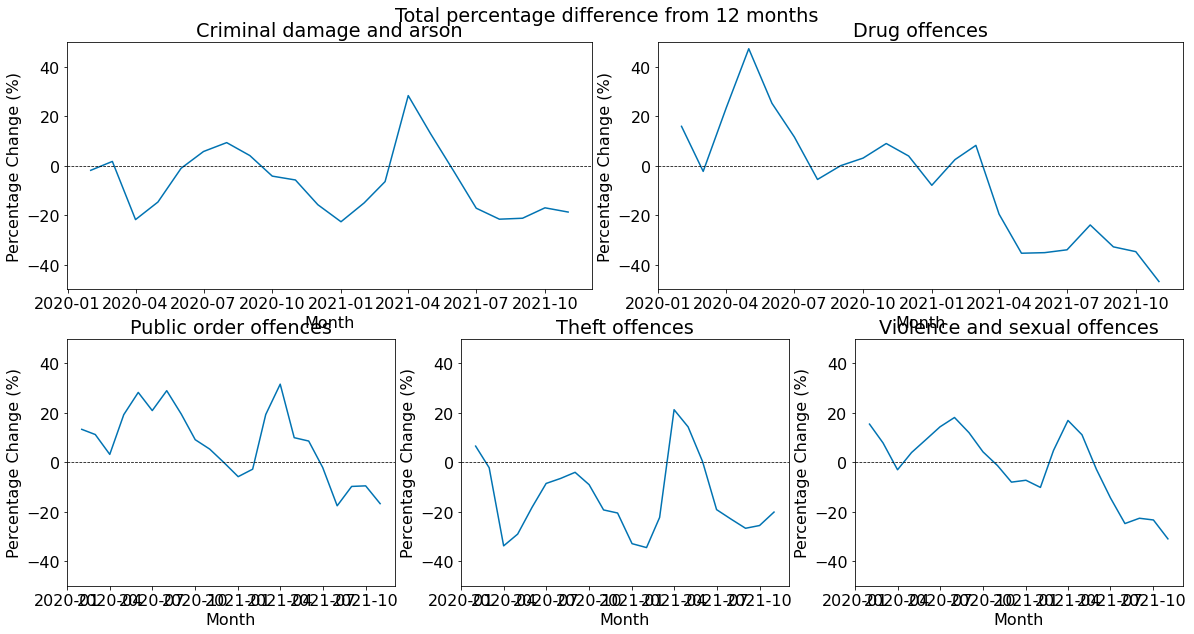

In [27]:
fig = plt.figure(figsize=(20,10))
grid = plt.GridSpec(2, 6, wspace=0.5, hspace=0.2)
a1 = fig.add_subplot(grid[0,:3])
a2 = fig.add_subplot(grid[0,3:])
a3 = fig.add_subplot(grid[1, :2])
a4 = fig.add_subplot(grid[1, 2:4])
a5 = fig.add_subplot(grid[1, 4:])
plotter2(grouped2,'Criminal damage and arson',ax=a1)
plotter2(grouped2,'Drug offences',ax=a2)
plotter2(grouped2,'Public order offences',ax=a3)
plotter2(grouped2,'Theft offences',ax=a4)
plotter2(grouped2,'Violence and sexual offences',ax=a5)
fig.suptitle('Total percentage difference from 12 months',y=0.93)
#fig.savefig('Total percentage difference from 12 months.jpg')
plt.show()

In [28]:
grouped3 = df.groupby(['Month','Crime_type','Region'])['Crime_ID'].count()
grouped3 = grouped3.reset_index()
grouped3

,Month,Crime_type,Region,Crime_ID
0,2019-01-01,Criminal damage and arson,East Midlands,9274
1,2019-01-01,Criminal damage and arson,North,4137
2,2019-01-01,Criminal damage and arson,South East,9821
3,2019-01-01,Criminal damage and arson,South West,5810
4,2019-01-01,Criminal damage and arson,West Midlands,7515
...,...,...,...,...
895,2021-12-01,Violence and sexual offences,East Midlands,15968
896,2021-12-01,Violence and sexual offences,North,4300
897,2021-12-01,Violence and sexual offences,South East,15799
898,2021-12-01,Violence and sexual offences,South West,7851


In [29]:
# EM = grouped3[(grouped3.Region=='East Midlands')&(grouped3.Crime_type=='Criminal damage and arson')].reset_index(drop=True)
# EM

This is the same as doing the pct change with a 12 month delay, just stratified by Region

In [72]:
def plotter3(df_grouped,crime_type,ax=None,**kwargs):
    EM = df_grouped[(df_grouped.Region=='East Midlands')&(df_grouped.Crime_type==crime_type)].reset_index(drop=True)
    WM = df_grouped[(df_grouped.Region=='West Midlands')&(df_grouped.Crime_type==crime_type)].reset_index(drop=True)
    SW = df_grouped[(df_grouped.Region=='South East')&(df_grouped.Crime_type==crime_type)].reset_index(drop=True)
    SE = df_grouped[(df_grouped.Region=='South West')&(df_grouped.Crime_type==crime_type)].reset_index(drop=True)
    N = df_grouped[(df_grouped.Region=='North')&(df_grouped.Crime_type==crime_type)].reset_index(drop=True)
    EM.loc[:,'Crime_ID'] = EM.Crime_ID.pct_change(12)
    WM.loc[:,'Crime_ID'] = WM.Crime_ID.pct_change(12)
    SW.loc[:,'Crime_ID'] = SW.Crime_ID.pct_change(12)
    SE.loc[:,'Crime_ID'] = SE.Crime_ID.pct_change(12)
    N.loc[:,'Crime_ID'] = N.Crime_ID.pct_change(12)
    EM = EM.drop(np.arange(0,12),axis=0)
    WM = WM.drop(np.arange(0,12),axis=0)
    SW = SW.drop(np.arange(0,12),axis=0)
    SE = SE.drop(np.arange(0,12),axis=0)
    N = N.drop(np.arange(0,12),axis=0)
    conked = pd.concat([EM,WM,SW,SE,N])
    conked.loc[:,'Crime_ID'] = conked.loc[:,'Crime_ID']*100
    ax=ax
    ax.set_title(crime_type)
    ax.set_ylabel('Percentage Change (%)')
    sns.lineplot(data=conked,x='Month',y='Crime_ID',hue='Region',ax=ax,**kwargs)
    ax.set_ylim(-70,70)
    ax.get_legend().remove()
    ax.axhline(y=0,xmin=0,xmax=1,linestyle='--',color='black',linewidth=0.75)
    return ax

In [79]:
plt.rcParams['font.size'] = '19'

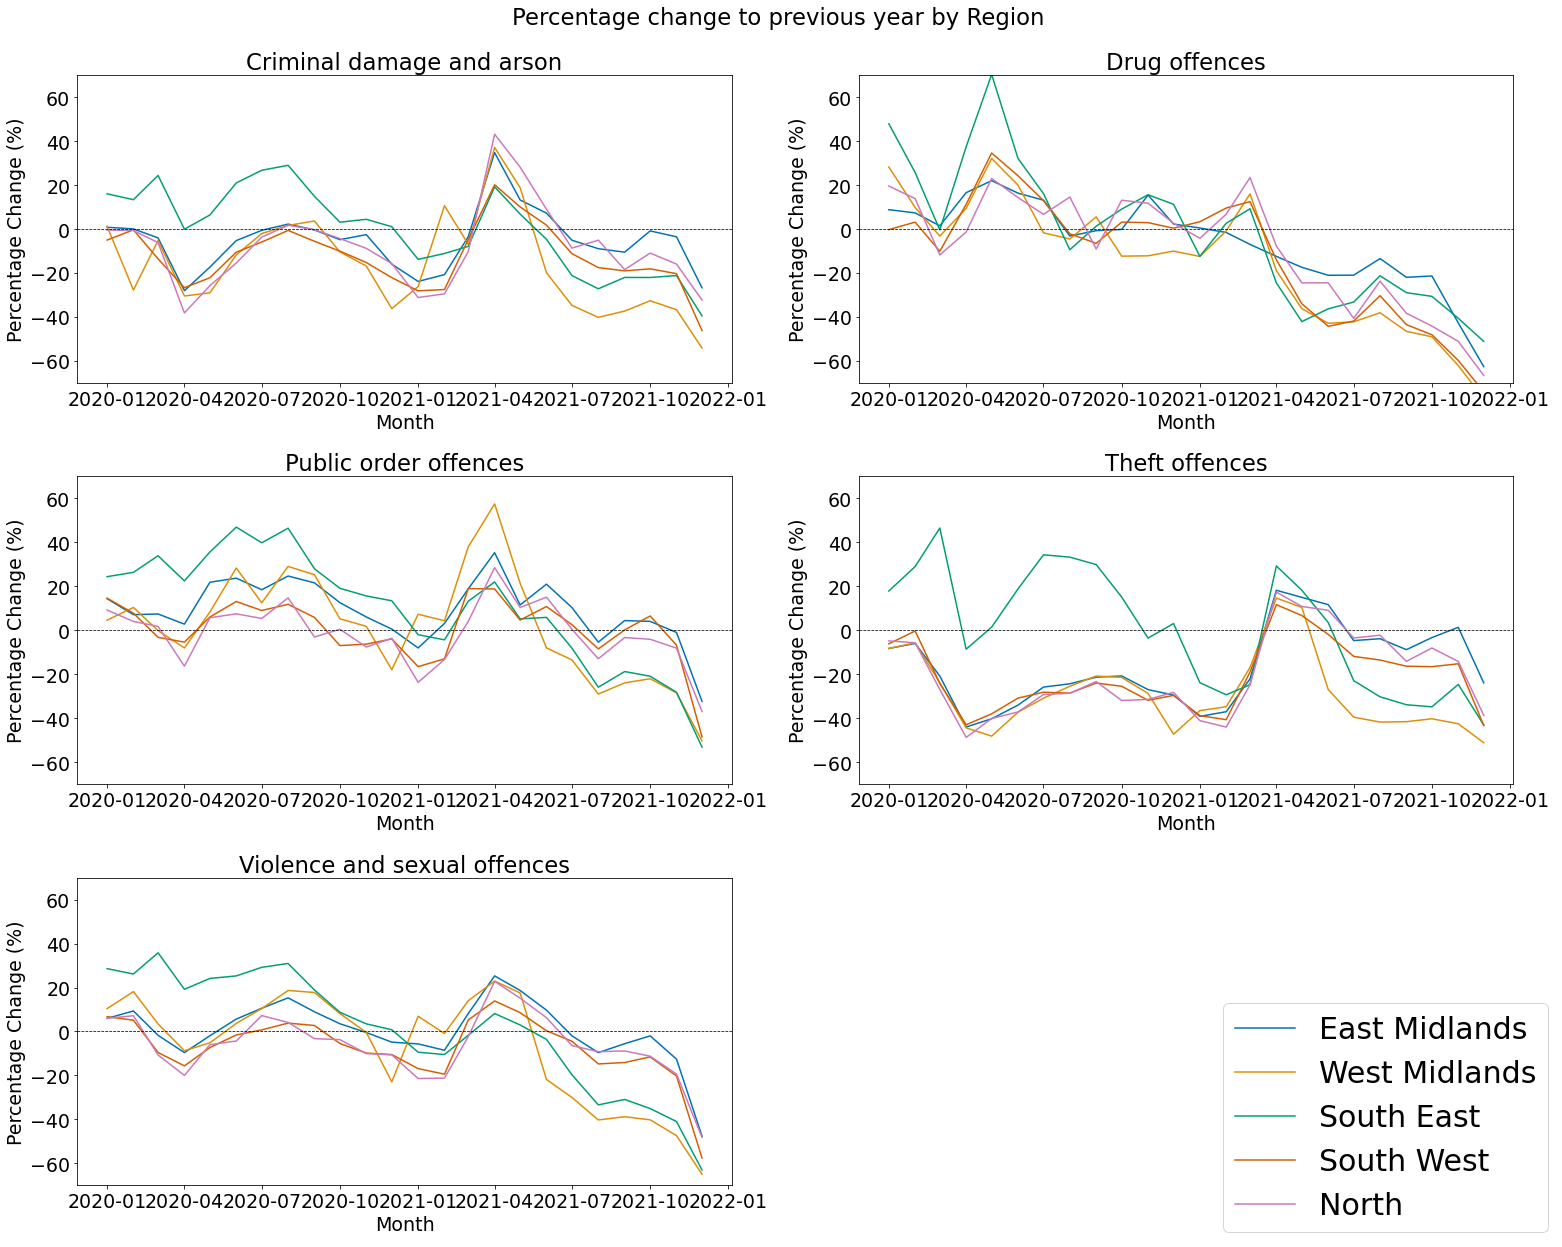

In [83]:

fig,((a1,a2),(a3,a4),(a5,a6)) = plt.subplots(3,2,figsize=(22,17))
#fig.subplots_adjust(hspace=0.3)
plotter3(grouped3,'Criminal damage and arson',ax=a1)
plotter3(grouped3,'Drug offences',ax=a2)
#fig2,(a3,a4) = plt.subplots(1,2,figsize=(20,5))
plotter3(grouped3,'Public order offences',ax=a3)
plotter3(grouped3,'Theft offences',ax=a4)
#fig3,(a5) = plt.subplots(1,1,figsize=(7.5,5))
plotter3(grouped3,'Violence and sexual offences',ax=a5)
a6.set_axis_off()
fig.tight_layout()
fig.suptitle('Percentage change to previous year by Region',y=1.02)
fig.legend(['East Midlands','West Midlands','South East','South West','North'],loc='lower right',prop={'size': 30})
#plt.savefig('Percentage change to previous year by Region.png')
plt.show()

In [32]:
#plotter3(grouped3,'Criminal damage and arson')

In [33]:
def pct_2019_median(df):
    df.loc[0,'Crime_ID'] = df.Crime_ID[0:12].median()
    df = df.drop(np.arange(1,12),axis=0)
    df['Crime_ID'] = (df['Crime_ID']-df.Crime_ID[0])/df.Crime_ID[0]
    df = df[df.Month != '2019-01-01']
    return df

In [70]:
def plotter4(df_grouped,crime_type,ax=None,**kwargs):
    EM = df_grouped[(df_grouped.Region=='East Midlands')&(df_grouped.Crime_type==crime_type)].reset_index(drop=True)
    WM = df_grouped[(df_grouped.Region=='West Midlands')&(df_grouped.Crime_type==crime_type)].reset_index(drop=True)
    SW = df_grouped[(df_grouped.Region=='South East')&(df_grouped.Crime_type==crime_type)].reset_index(drop=True)
    SE = df_grouped[(df_grouped.Region=='South West')&(df_grouped.Crime_type==crime_type)].reset_index(drop=True)
    N = df_grouped[(df_grouped.Region=='North')&(df_grouped.Crime_type==crime_type)].reset_index(drop=True)
    EM = pct_2019_median(EM)
    WM = pct_2019_median(WM)
    SW = pct_2019_median(SW)
    SE = pct_2019_median(SE)
    N = pct_2019_median(N)
    conked = pd.concat([EM,WM,SW,SE,N])
    conked.loc[:,'Crime_ID'] = conked.loc[:,'Crime_ID']*100
    ax=ax
    ax.set_title(crime_type)
    ax.set_ylabel('Percentage Change (%)')
    sns.lineplot(data=conked,x='Month',y='Crime_ID',hue='Region',ax=ax,**kwargs)
    ax.set_ylim(-70,70)
    ax.get_legend().remove()
    ax.axhline(y=0,xmin=0,xmax=1,linestyle='--',color='black',linewidth=0.75)
    return conked

This is the same as comparing each region to a 2019 median value.

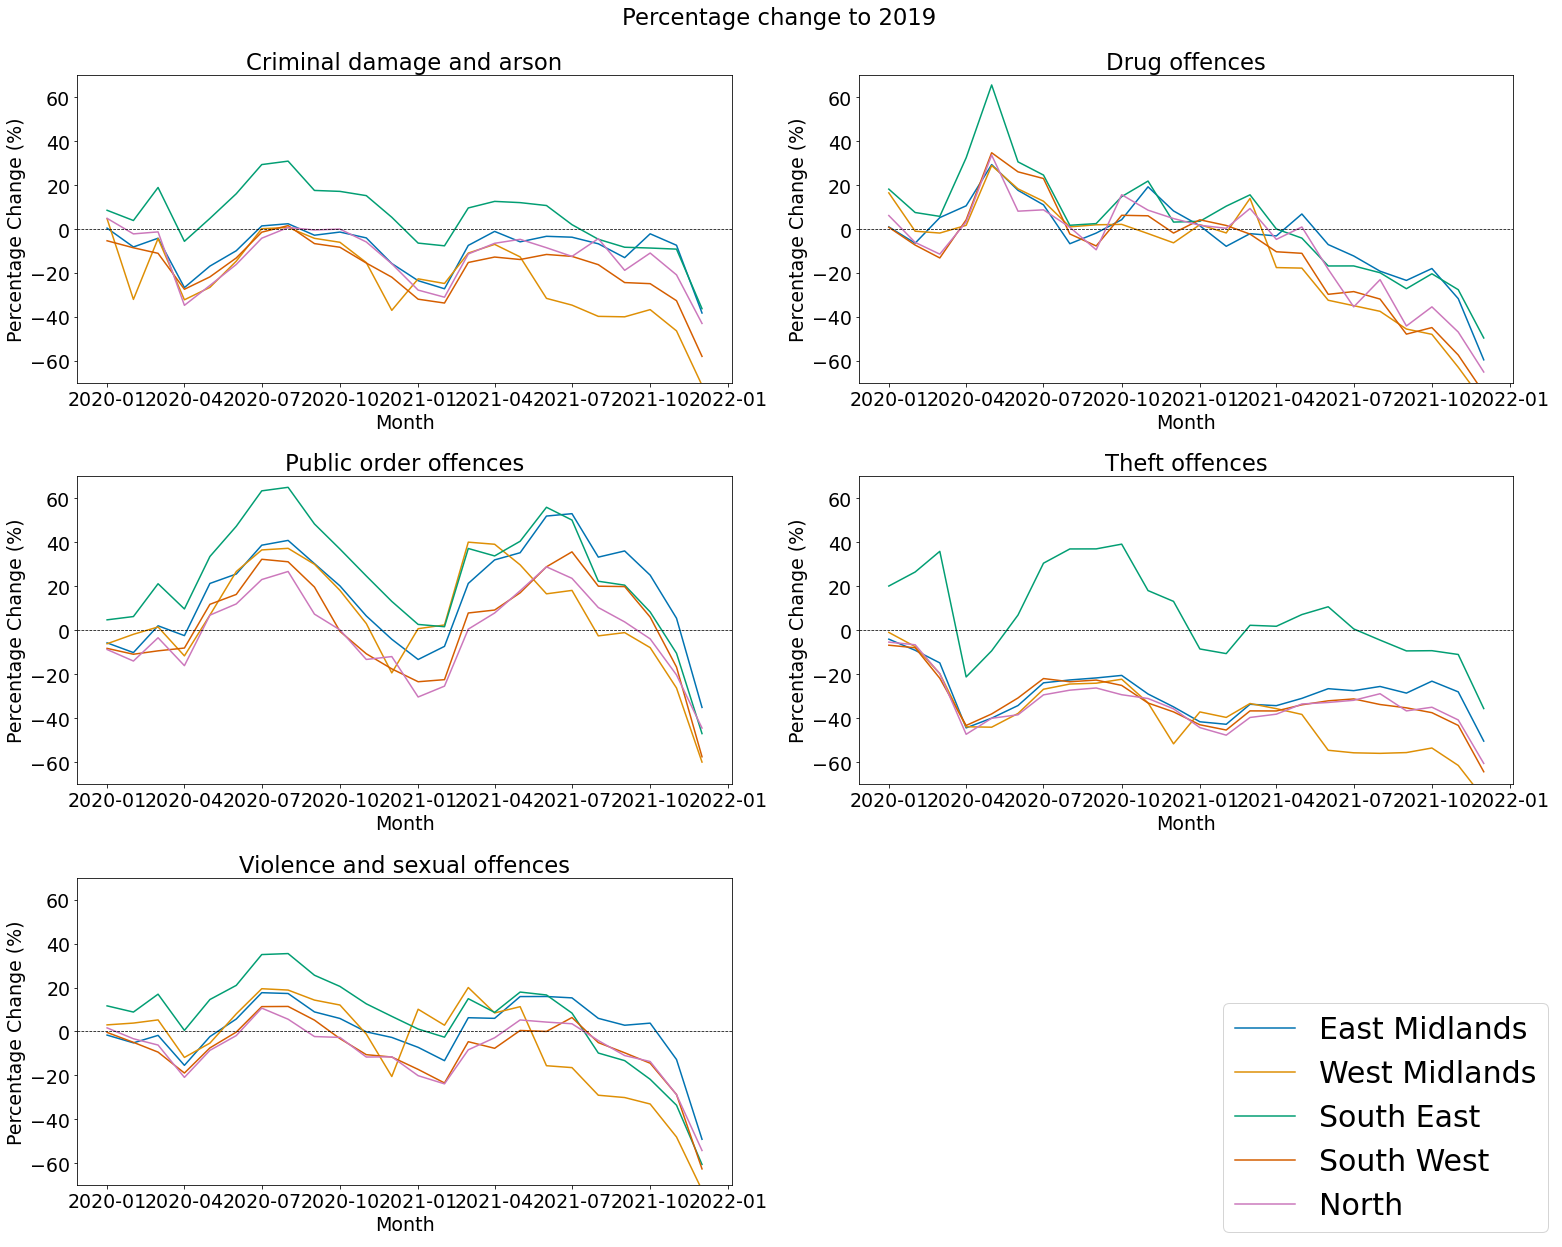

In [84]:
fig,((a1,a2),(a3,a4),(a5,a6)) = plt.subplots(3,2,figsize=(22,17))
plotter4(grouped3,'Criminal damage and arson',ax=a1)
plotter4(grouped3,'Drug offences',ax=a2)
#fig2,(a3,a4) = plt.subplots(1,2,figsize=(20,5))
plotter4(grouped3,'Public order offences',ax=a3)
plotter4(grouped3,'Theft offences',ax=a4)
#fig3,(a5) = plt.subplots(1,1,figsize=(7.5,5))
plotter4(grouped3,'Violence and sexual offences',ax=a5)
a6.set_axis_off()
fig.tight_layout()
fig.legend(['East Midlands','West Midlands','South East','South West','North'],loc='lower right',prop={'size': 30})
fig.suptitle('Percentage change to 2019', y=1.02)
# import matplotlib.backends.backend_pdf
# pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
# for fig in range(1, 4): ## will open an empty extra figure :(
#     pdf.savefig( fig )
# pdf.close()
fig.savefig('Percentage change to 2019 by region.png')
plt.show()